# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

Code from helper

In [2]:
import epidemics_helper
from networkx.readwrite import json_graph
import json

In [17]:
def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

G = read_json_file("data/nyc_augmented_network.json")

In [103]:
sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=.1)

In [120]:
sir.launch_epidemic(source=23654, max_time=100.0)

Epidemic stopped after 100.68 days | 100.68 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


Functions for plotting 

In [146]:
days=100

inf_time=[0]*days
rec_time=[0]*days
inf_time_sum=[0]*days
rec_time_sum=[0]*days
susc_time=[len(G.nodes())]*days

In [147]:
for i in range(len(G.nodes())):
    if sir.inf_time[i] != float('inf'):
        inf_time[int(sir.inf_time[i])]=inf_time[int(sir.inf_time[i])]+1
    if sir.rec_time[i] != float('inf') :
        rec_time[int(sir.rec_time[i])]=rec_time[int(sir.rec_time[i])]+1



for i in range(days):
    if i!=0:
        rec_time_sum[i]=rec_time[i]+rec_time_sum[i-1]
        inf_time_sum[i]=inf_time[i]+inf_time_sum[i-1]-rec_time[i]
        susc_time[i]=susc_time[i-1]-inf_time[i]
    else:
        rec_time_sum[i]=rec_time[i]
        inf_time_sum[i]=inf_time[i]
        susc_time[i]=susc_time[i]-inf_time[i]
        
num_nodes=len(G.nodes())
        
for i in range(days):
    susc_time[i]=susc_time[i]*100/num_nodes
    rec_time_sum[i]=rec_time_sum[i]*100/num_nodes
    inf_time_sum[i]=inf_time_sum[i]*100/num_nodes

Epidemic over time

Infection and recovery each day


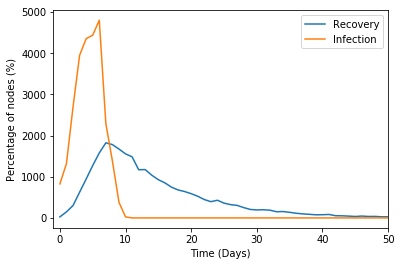

In [148]:
print ("Infection and recovery each day")
plt1=plt.plot(rec_time)
plt2=plt.plot(inf_time)
plt.legend(["Recovery","Infection"])
#plt.plot(susc_time, label="Suceptible")
plt.gca().set_xlim([-1,days-50])
plt.xlabel("Time (Days)")
plt.ylabel("Percentage of nodes (%)")
plt.show()

percentege of infected and recovered people over time


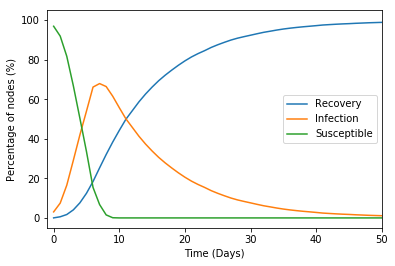

In [149]:
print ("percentege of infected and recovered people over time")
plt1=plt.plot(rec_time_sum)
plt2=plt.plot(inf_time_sum)
plt.plot(susc_time)
plt.legend(["Recovery","Infection","Susceptible"])
#plt.plot(susc_time, label="Suceptible")
plt.gca().set_xlim([-1,days-50])
plt.xlabel("Time (Days)")
plt.ylabel("Percentage of nodes (%)")
plt.show()

The plot shows that it takes around seven days until over sixty percent of nodes are infected.    How can they be dead when they recover???

In [172]:
def visualize_in_graph(days,sir):
    #create color array for the nodes
    node_color=["g"]*num_nodes 
    
    #get node status returns 
    # 0 -- susceptible
    # 1 -- infected
    # 2 -- recovered
    
    for i in range(num_nodes):
        status=sir.get_node_status(i,days)
        if status != 0: # green for susceptible
            if status==1:
                node_color[i]="r"  #red for infected
            else:
                node_color[i]="b"  #blue for recovered
    
    nx.draw(G, node_color=node_color)
    plt.show()

New York after one day

In [ ]:
visualize_in_graph(1,sir)

/Applications/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()


New York after three days

In [ ]:
visualize_in_graph(3,sir)

New York after 30 days

In [ ]:
visualize_in_graph(30,sir)

---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

In [ ]:
#TODO: find out, removing edges during or before the epidemic? probably before





#### Exercise 2.11: Strategy 2